Huấn luyện trên Stats.scipy

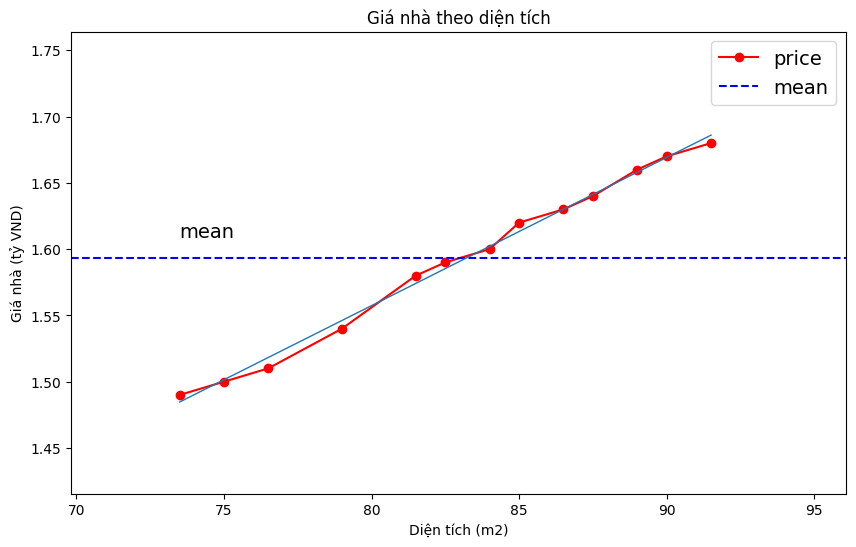

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# area
x = np.array([73.5, 75., 76.5, 79., 81.5, 82.5, 84.,
             85., 86.5, 87.5, 89., 90., 91.5])
# price
y = np.array([1.49, 1.50, 1.51, 1.54, 1.58, 1.59, 1.60,
             1.62, 1.63, 1.64, 1.66, 1.67, 1.68])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


def myfunc(x):
    return slope * x + intercept


def _plot(x, y, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(10, 6))

    mymodel = list(map(myfunc, x))

    plt.plot(x, y, 'r-o', label='price')
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y)
    y_max = np.max(y)

    # mean price
    ybar = np.mean(y)
    plt.axhline(ybar, linestyle='--', color='blue', label='mean')
    plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.text(x_min, ybar*1.01, "mean", fontsize=14)
    plt.legend(fontsize=14)
    plt.title(title)

    plt.plot(x, mymodel, linewidth=1)

    plt.show()


_plot(x, y, 'Giá nhà theo diện tích', 'Diện tích (m2)', 'Giá nhà (tỷ VND)')

Huấn luyện trên scikit learn

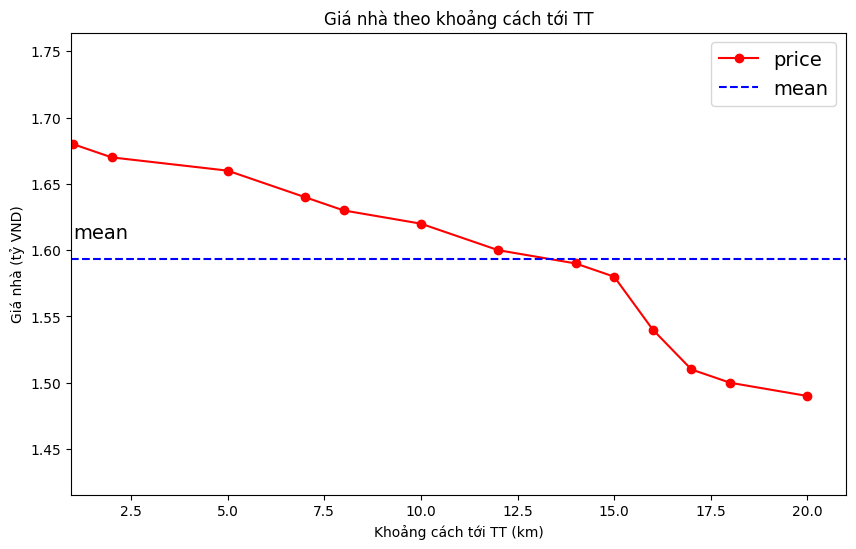

Coefficient :  [[0.01252422 0.00130004]]
Interception  :  [0.53665806]


In [3]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np


# area
x1 = np.array([[73.5, 75., 76.5, 79., 81.5, 82.5, 84.,
              85., 86.5, 87.5, 89., 90., 91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis=1)

# price
y = np.array([[1.49, 1.50, 1.51, 1.54, 1.58, 1.59, 1.60,
             1.62, 1.63, 1.64, 1.66, 1.67, 1.68]]).T


def _plot(x, y, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(10, 6))

    plt.plot(x, y, 'r-o', label='price')
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y)
    y_max = np.max(y)

    # mean price
    ybar = np.mean(y)
    plt.axhline(ybar, linestyle='--', color='blue', label='mean')
    plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.text(x_min, ybar*1.01, "mean", fontsize=14)
    plt.legend(fontsize=14)
    plt.title(title)

    plt.show()


_plot(x2, y,
      title='Giá nhà theo khoảng cách tới TT',
      xlabel='Khoảng cách tới TT (km)',
      ylabel='Giá nhà (tỷ VND)')


# fit the model by Linear Regression
# fit_intercept = False for calculating the bias
regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(X, y)

# Compare two results
print('Coefficient : ', regr.coef_)
print('Interception  : ', regr.intercept_)

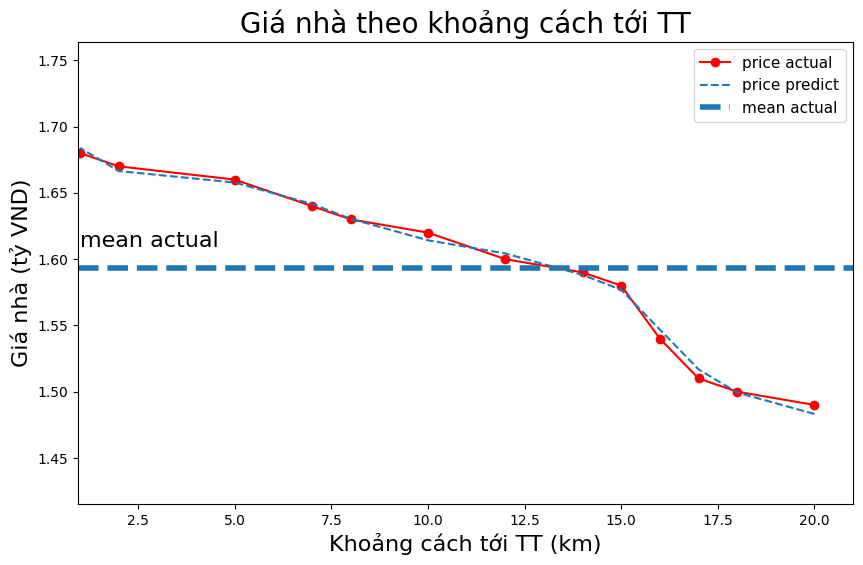

In [4]:
# Dự báo giá nhà ngay trên tập huấn luyện
ypred = regr.predict(X)

# Visualize data


def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_act, 'r-o', label="price actual")
    plt.plot(x, y_pred, '--', label="price predict")
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y_act)
    y_max = np.max(y_act)
    # mean price
    ybar = np.mean(y_act)
    plt.axhline(ybar, linestyle='--', linewidth=4, label="mean actual")
    plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.text(x_min, ybar*1.01, "mean actual", fontsize=16)
    plt.legend(fontsize=11)
    plt.title(title, fontsize=20    )
    plt.show()


_plot_act_pred(x2, y, ypred,
               title='Giá nhà theo khoảng cách tới TT',
               xlabel='Khoảng cách tới TT (km)',
               ylabel='Giá nhà (tỷ VND)')

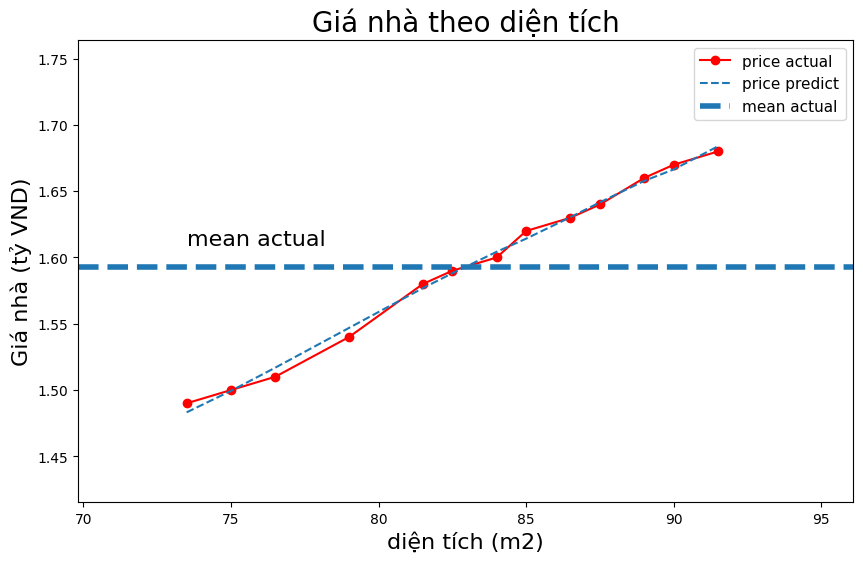

In [5]:
_plot_act_pred(x1, y, ypred,
               title='Giá nhà theo diện tích',
               xlabel='diện tích (m2)',
               ylabel='Giá nhà (tỷ VND)')

Biểu diễn trong không gian 3 chiều

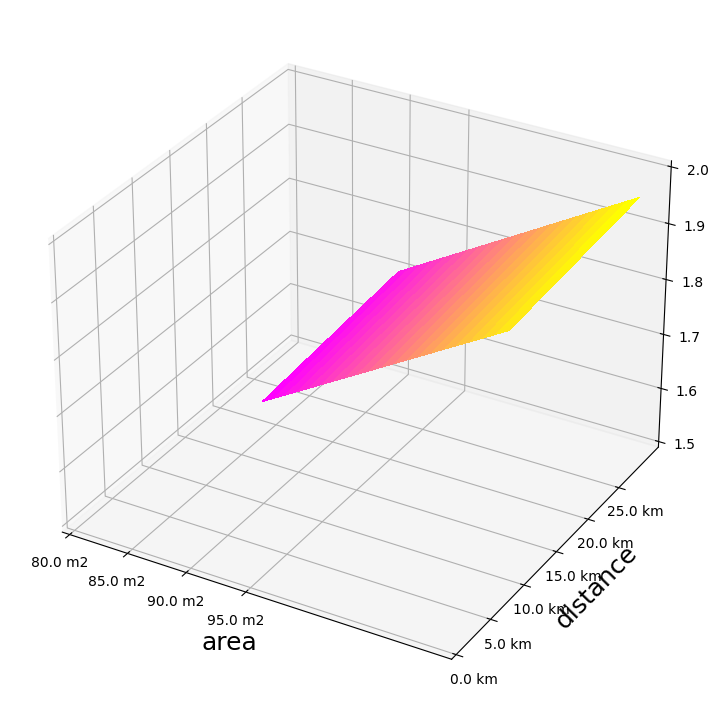

In [6]:
# Khởi tạo diện tích
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x1 = np.arange(90, 111, 1)
x1 = np.expand_dims(x1, axis=1)
# Khởi tạo khoảng cách tới trung tâm
x2 = np.arange(10, 31, 1)
x2 = np.expand_dims(x2, axis=1)
# Ma trận đầu vào
X = np.concatenate([x1, x2], axis=1)

# Dự báo
ypred = regr.predict(X)

# Tạo lưới ma trận
x1grid, x2grid = np.meshgrid(x1, x2)

ys = []
for i in range(len(x1)):
    x1i = x1grid[:, i:(i+1)]
    x2i = x2grid[:, i:(i+1)]
    X = np.concatenate([x1i, x2i], axis=1)
    yi = regr.predict(X)
    ys.append(yi)

ypred = np.concatenate(ys, axis=1)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface.
surf = ax.plot_surface(x1grid, x2grid, ypred, cmap=cm.spring,
                       linewidth=0, antialiased=False)


x_pos = np.arange(80.0, 100.0, 5)
x_names = [str(x_tick) + " m2" for x_tick in x_pos]
plt.xticks(x_pos, x_names)

y_pos = np.arange(0.0, 30.0, 5)
y_names = [str(y_tick) + " km" for y_tick in y_pos]
plt.yticks(y_pos, y_names)

ax.set_zlim(1.5, 2.0)
plt.xlabel('area', fontsize=18)
plt.ylabel('distance', fontsize=18)

plt.show()

Ridge regression và Lasso regression

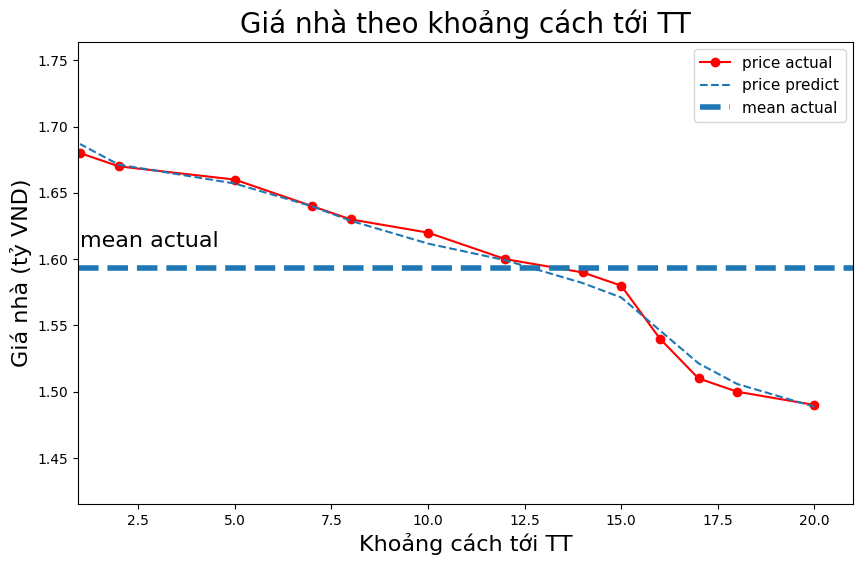

In [7]:
# Ridge regression.

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# area
x1 = np.array([[73.5, 75., 76.5, 79., 81.5, 82.5, 84.,
              85., 86.5, 87.5, 89., 90., 91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis=1)
# price
y = np.array([[1.49, 1.50, 1.51, 1.54, 1.58, 1.59, 1.60,
             1.62, 1.63, 1.64, 1.66, 1.67, 1.68]]).T

# Chuẩn hóa các đặc trưng đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)

rid_regr = Ridge(alpha=0.3)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

_plot_act_pred(x2, y, y_pred_rid,
               title='Giá nhà theo khoảng cách tới TT',
               xlabel='Khoảng cách tới TT',
               ylabel='Giá nhà (tỷ VND)')

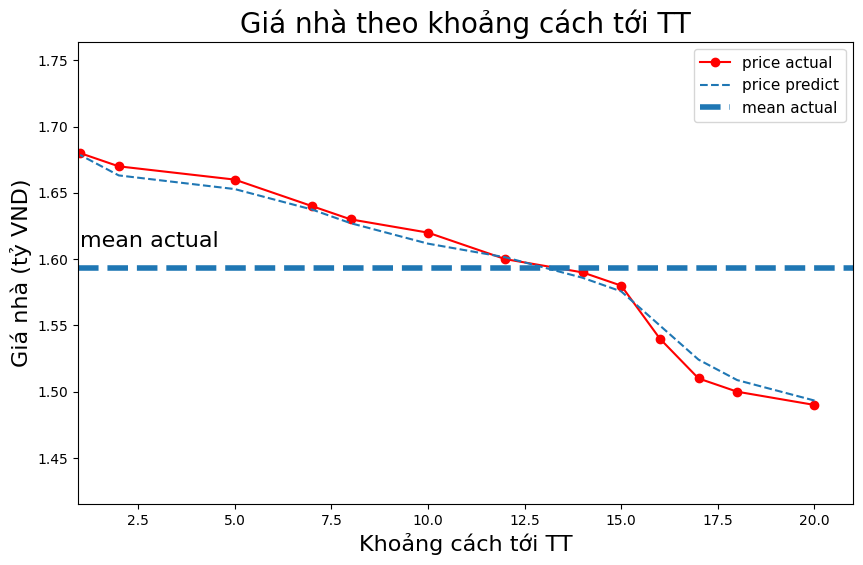

In [8]:
# Lasso regression

from sklearn.linear_model import Lasso

las_regr = Lasso(alpha=0.005)
las_regr.fit(X, y)

y_pred_las = las_regr.predict(X)

_plot_act_pred(x2, y, y_pred_las,
               title='Giá nhà theo khoảng cách tới TT',
               xlabel='Khoảng cách tới TT',
               ylabel='Giá nhà (tỷ VND)')

Tuning hệ số alpha

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

grid_search = np.arange(0, 1, 0.05)

def _regression(alpha, X_train, y_train, X_test, y_test, models: dict):
  dict_models = {}
  rid_regr = Ridge(alpha = alpha)
  rid_regr.fit(X_train, y_train)
  y_pred = rid_regr.predict(X_test)
  MSE = np.mean((y_test-y_pred)**2)
  dict_models["MSE"] = MSE
  dict_models["model"] = rid_regr
  model_name = "ridge_" + str(alpha)
  models[model_name] = dict_models
  return models

# Phân chia tập huấn luyện, kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10, 2) (3, 2)
(10, 1) (3, 1)


In [10]:
models = {}
for alpha in grid_search:
  models = _regression(round(alpha, 2), X_train, y_train, X_test, y_test, models)

In [11]:
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k

  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))

model ridge_0.0, MSE: 1.0272739095963804e-05
model ridge_0.05, MSE: 1.2958990736810562e-05
model ridge_0.1, MSE: 2.2686672860576626e-05
model ridge_0.15, MSE: 3.360321209742716e-05
model ridge_0.2, MSE: 4.402525045541664e-05
model ridge_0.25, MSE: 5.3510069437723625e-05
model ridge_0.3, MSE: 6.201406777581933e-05
model ridge_0.35, MSE: 6.961971105091507e-05
model ridge_0.4, MSE: 7.644092616428229e-05
model ridge_0.45, MSE: 8.25900559674779e-05
model ridge_0.5, MSE: 8.816729869455444e-05
model ridge_0.55, MSE: 9.32585199082519e-05
model ridge_0.6, MSE: 9.79360749650968e-05
model ridge_0.65, MSE: 0.00010226055478706195
model ridge_0.7, MSE: 0.00010628265070102847
model ridge_0.75, MSE: 0.00011004485009660446
model ridge_0.8, MSE: 0.00011358288271159853
model ridge_0.85, MSE: 0.00011692691842565282
model ridge_0.9, MSE: 0.00012010254564019651
model ridge_0.95, MSE: 0.00012313156582321094
-----------------------------------------
Best models: ridge_0.0, MSE: 1.0272739095963804e-05


Kết quả với alpha = 0

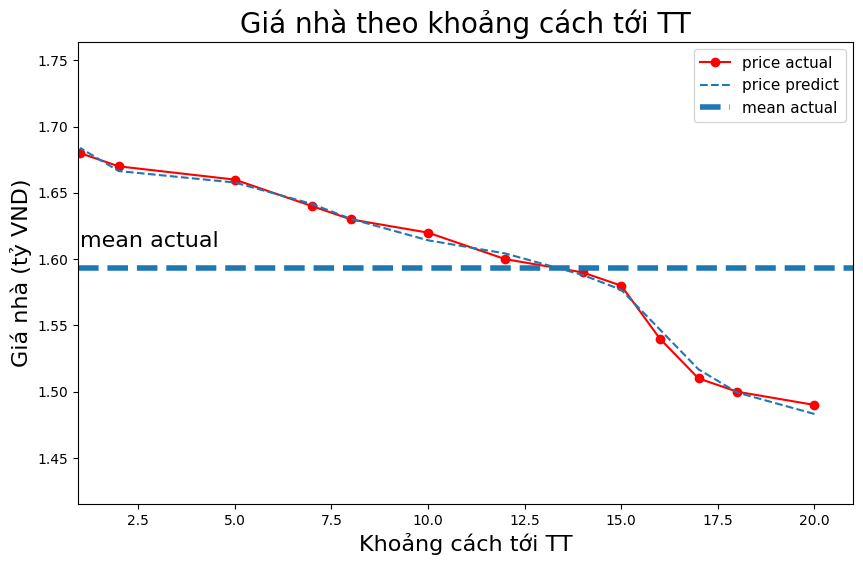

In [17]:
# Chuẩn hóa các đặc trưng đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)

rid_regr = Ridge(alpha=0)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

_plot_act_pred(x2, y, y_pred_rid,
               title='Giá nhà theo khoảng cách tới TT',
               xlabel='Khoảng cách tới TT',
               ylabel='Giá nhà (tỷ VND)')

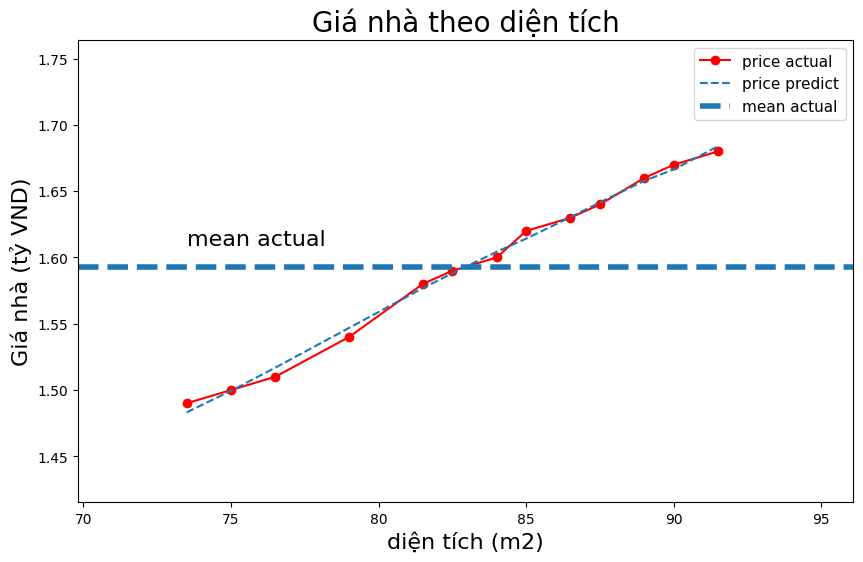

In [18]:
# Chuẩn hóa các đặc trưng đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)

rid_regr = Ridge(alpha=0)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

_plot_act_pred(x1, y, y_pred_rid,
               title='Giá nhà theo diện tích',
               xlabel='diện tích (m2)',
               ylabel='Giá nhà (tỷ VND)')